In [1]:
from fastai.vision.all import *
import torch

In [2]:
path = Path('../../../data/extracted_images')

def label_func(file):
    status = file.split('-')[1][0]
    code = file[-8:-4]
    if code.count('0') == 4:
        syn = 0
    else:
        count = (
            (1, code.count('1')),
            (2, code.count('2')),
            (3, code.count('3')),
            (4, code.count('4')),
            (5, code.count('5'))
        )
        syn = max(count, key=itemgetter(1))[0]
    code = status + str(syn)
    covid = ['33', '03', '30', '23', '31', '32', '34']
    other = ['15', '05', '10', '25', '21', '22', '24', '01', '02', '04', '20']
    if code in covid:
        return True
    elif code in other:
        return False

In [3]:
dls = ImageDataLoaders.from_name_func(
    path=path,
    fnames=get_image_files(path),
    label_func=label_func,
    item_tfms=Resize(1025, pad_mode='zeros'),
    valid_pct=0.2,
    seed=3,
    bs=4,
    num_workers=0,
    device=torch.device('cuda')
)

In [4]:
learn = vision_learner(
    dls,
    models.resnet18,
    metrics=[accuracy, error_rate, F1Score()]
)

In [9]:
learn.fine_tune(1) # 2

epoch,train_loss,valid_loss,accuracy,error_rate,f1_score,time
0,0.260216,0.407426,0.932180,0.067820,0.000000,28:42


epoch,train_loss,valid_loss,accuracy,error_rate,f1_score,time
0,0.326501,0.252099,0.932180,0.067820,0.000000,35:44


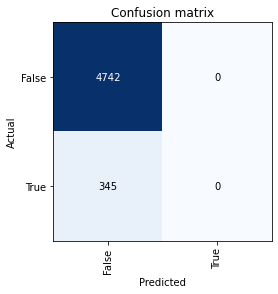

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [7]:
learn.predict('../../../data/public_dataset/314-10000.png')

FileNotFoundError: [Errno 2] No such file or directory: '../../../data/public_dataset/314-10000.png'

In [ ]:
learn.export()

In [ ]:
learn = load_learner('./model.pkl')